In [404]:
import scipy, sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
sys.path.append("/Users/alex/Desktop/Fabry-Perot/modelling")
sys.path.append(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\modelling")
sys.path.append(r"C:\Users\ge85rek\Desktop\Fabry-Perot\modelling")
import read_csv, T_and_R
data = read_csv.read_csv(r"/Users/alex/Desktop/Fabry-Perot/data/InGaN_FTIR.csv") #MacOS
#data = read_csv.read_csv(r"C:\Users\ge85rek\Desktop\Fabry-Perot\data\InGaN_FTIR.csv") #Labor
#data = read_csv.read_csv(r"C:\Users\da1qu1r1\Dropbox\Arbeit\Fabry-Perot\data\InGaN_FTIR.csv") # PC

In [405]:
# von cm zu m 
frequenz = scipy.constants.c * np.array(data[0][::-1]) * 100
wavelength = scipy.constants.c/frequenz

In [406]:
# return index of a sorted list wherelist[index] is a specific value 
def find_nearest(array, value):
    array = np.asarray(array)
    end = (np.abs(array - value)).argmin()
    return end

def flatten(data, N = 1200, cutdown = None, cutup = None):
    smooth = np.convolve(data, np.ones(N)/N, mode='same')
    return smooth[cutdown:cutup], data[cutdown:cutup]-smooth[cutdown:cutup]

def länge(m,n,f):
    lam = scipy.constants.c/f
    return m * lam / (2 * n)

def calculate_m(min_frequenz_array):
    lambda_array = [scipy.constants.c/f for f in min_frequenz_array]
    m_array = []
    for i in range(0,len(lambda_array)-1):
        m_array.append(lambda_array[i+1]/(lambda_array[i]-lambda_array[i+1]))
    return m_array

def calculate_m_looking_back(min_frequenz_array):
    lambda_array = [scipy.constants.c/f for f in min_frequenz_array]
    m_array = []
    for i in range(1,len(lambda_array)):
        m_array.append(lambda_array[i-1]/(lambda_array[i-1]-lambda_array[i]))
    return m_array

def polynomial(x,a0,a1,a2,a3,a4):
    return a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 

def sine(x,k,A,phi):
    return A*np.sin(k*x-phi)

def refractive_index(m,L,f):
    wavelength = scipy.constants.c/f
    n = (m * wavelength) / (2 * L)
    return n 

def fit_individually(xlim_lower_value,xlim_upper_value,x_dataset,y_dataset, p0 = [1,1,1,1,1]):
    x_lim_lower = find_nearest(x_dataset,xlim_lower_value)
    x_lim_upper = find_nearest(x_dataset,xlim_upper_value)
    x_data_modified = x_dataset[x_lim_lower:x_lim_upper]
    y_data_modified = y_dataset[x_lim_lower:x_lim_upper]
    params_fit, cov_fit = scipy.optimize.curve_fit(polynomial,x_data_modified,y_data_modified, p0 = p0)
    fitfunc = polynomial(x_data_modified,*params_fit)
    min_fit_index = scipy.signal.argrelmin(fitfunc, order = 500)
    min_fit_frequenz = x_data_modified[min_fit_index]
    min_fit_absorption = fitfunc[min_fit_index]
    plt.plot(x_data_modified,y_data_modified)
    plt.plot(min_fit_frequenz,min_fit_absorption, "ro")
    plt.plot(x_data_modified,fitfunc)
    return min_fit_frequenz, min_fit_absorption

In [407]:
cutdown = find_nearest(frequenz, 0.8e14)
cutup = find_nearest(frequenz, 2.0e14)
ends = 600
frequenz_20_cut = frequenz[cutdown:cutup]
frequenz_20_no_edge = frequenz[cutdown+ends:cutup-ends]
data_B12_20 = data[4][::-1][cutdown:cutup]
data_B12_20_no_edge = data_B12_20[ends:-ends]
B12_20_smooth, B12_20_smoothed_out = flatten(data_B12_20, N = 1200)
B12_20_smooth_no_edge = B12_20_smooth[ends:-ends]
B12_20_smoothed_out_no_edge = B12_20_smoothed_out[ends:-ends]

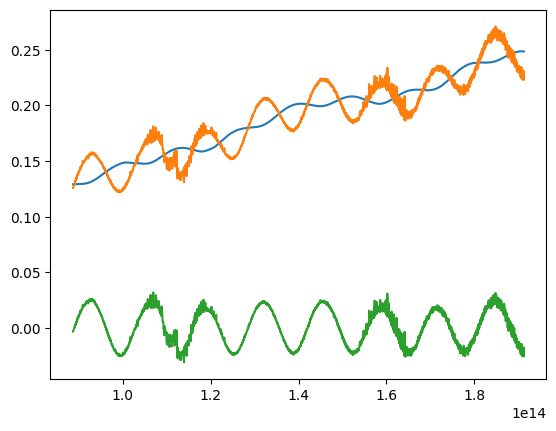

In [408]:
plt.plot(frequenz_20_no_edge, B12_20_smooth_no_edge)
plt.plot(frequenz_20_no_edge, data_B12_20_no_edge)
plt.plot(frequenz_20_no_edge, B12_20_smoothed_out_no_edge)

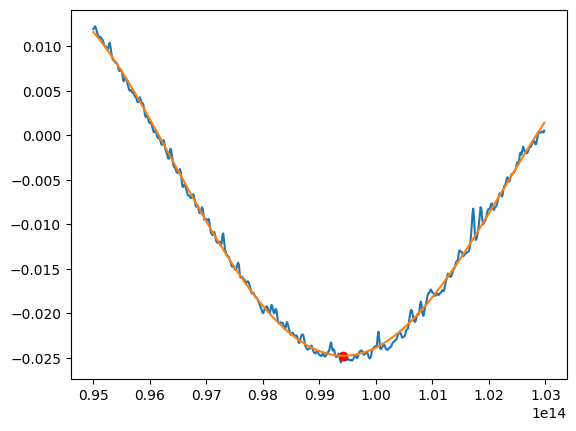

In [409]:
min_frequenz_first, min_absorption_first = fit_individually(0.95e14,1.03e14,frequenz_20_no_edge,B12_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

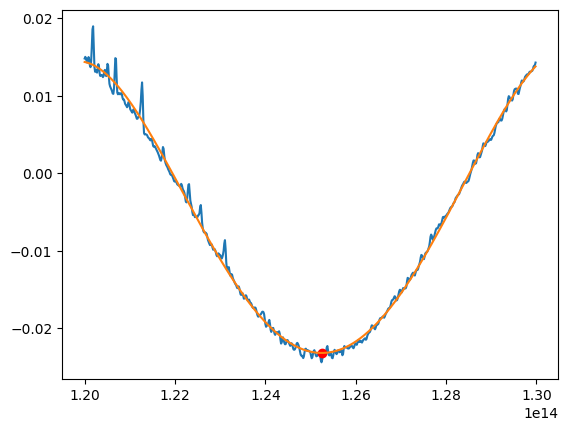

In [410]:
min_frequenz_second, min_absorption_second = fit_individually(1.2e14,1.3e14,frequenz_20_no_edge,B12_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

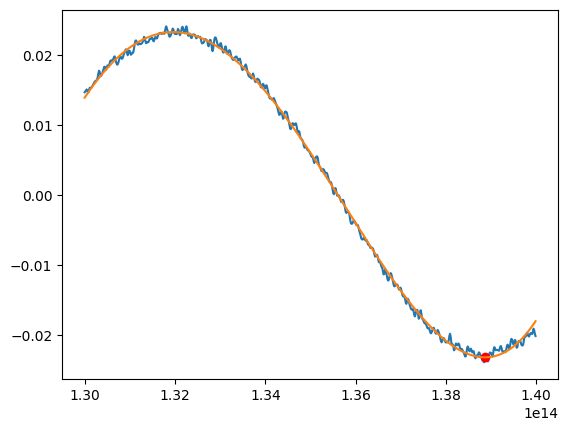

In [411]:
min_frequenz_third, min_absorption_third = fit_individually(1.3e14,1.4e14,frequenz_20_no_edge,B12_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

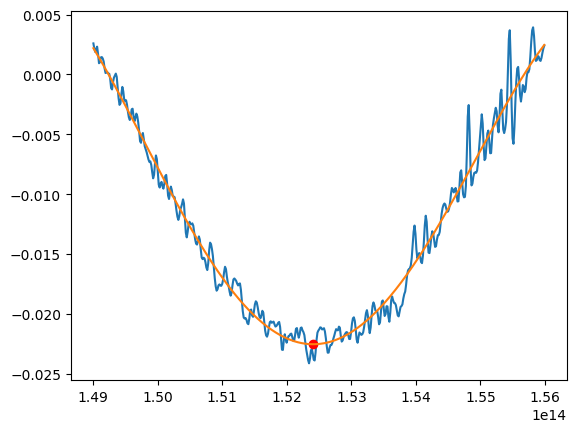

In [412]:
min_frequenz_fourth, min_absorption_fourth = fit_individually(1.49e14,1.56e14,frequenz_20_no_edge,B12_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

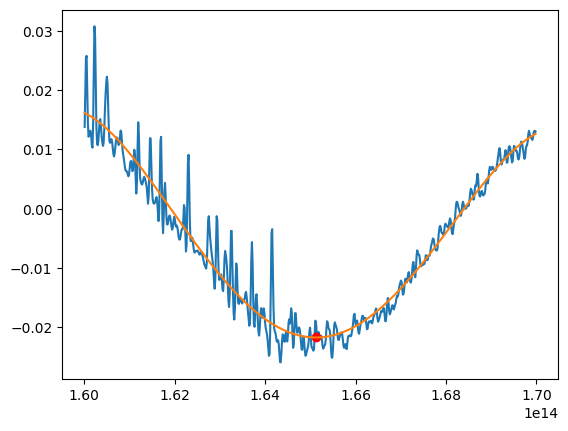

In [413]:
min_frequenz_fifth, min_absorption_fifth = fit_individually(1.6e14,1.7e14,frequenz_20_no_edge,B12_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

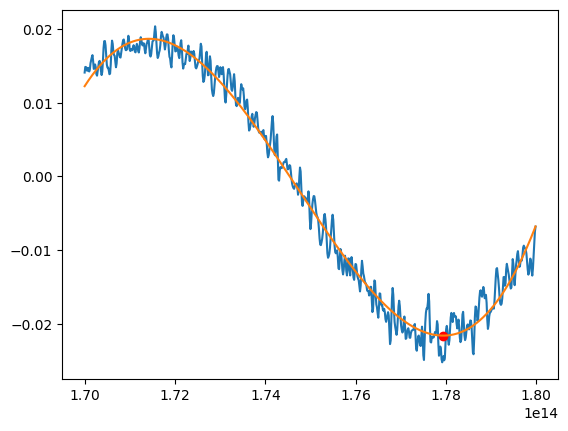

In [414]:
min_frequenz_sixth, min_absorption_sixth = fit_individually(1.7e14,1.8e14,frequenz_20_no_edge,B12_20_smoothed_out_no_edge, p0 = [1,1,1,1,1])

In [415]:
min_frequenz_total = [min_frequenz_first[0], min_frequenz_second[0], min_frequenz_third[0], min_frequenz_fourth[0], min_frequenz_fifth[0], min_frequenz_sixth[0]]
min_absorption_total = [min_absorption_first[0], min_absorption_second[0], min_absorption_third[0], min_absorption_fourth[0], min_absorption_fifth[0], min_absorption_sixth[0]]

In [416]:
min_frequenz_total 

[99424235004366.66,
 125241577799862.19,
 138858563726665.16,
 152403272689768.9,
 165124023906950.6,
 177931507510550.6]

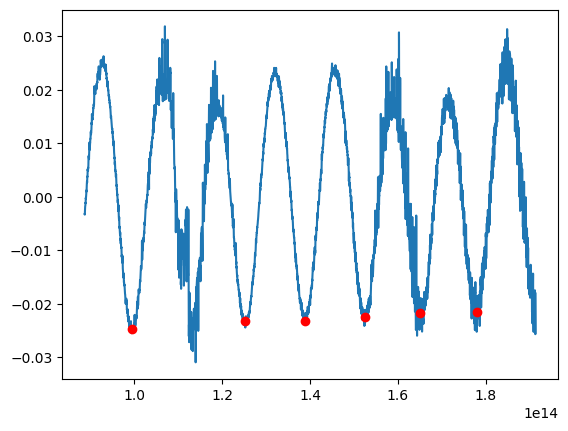

In [417]:
plt.plot(frequenz_20_no_edge,B12_20_smoothed_out_no_edge)
plt.plot(min_frequenz_total,min_absorption_total, "ro")

In [418]:
m_array_total = calculate_m(min_frequenz_total)
m_array_total

[3.8510638291448682,
 9.197452246267138,
 10.25186765584412,
 11.980681807841716,
 12.892776521731127]

In [419]:
m_array_clean = np.arange(7,14)
m_array_clean = np.delete(m_array_clean, 1)

In [420]:
n_array_total = []
for i in range(0,len(m_array_clean)):
    n_array_total.append(refractive_index(m_array_clean[i],3.5e-6,min_frequenz_total[i]))
n_array_total

[3.015285538649941,
 3.077631668102669,
 3.0842529873997093,
 3.0911569396477003,
 3.112387379135127,
 3.129054712060969]

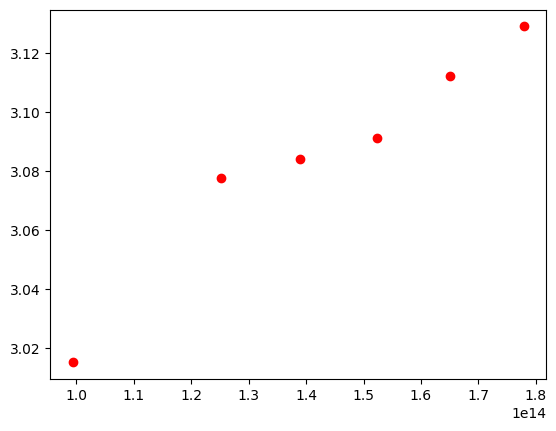

In [421]:
plt.plot(min_frequenz_total,n_array_total, "ro")

In [422]:
params_fit, cov_fit = scipy.optimize.curve_fit(polynomial,min_frequenz_total,n_array_total, p0 = [1,1,1,1,1])

In [423]:
params_fit

array([-4.63886287e+00,  2.13920218e-13, -2.20843831e-27,  1.00386432e-41,
       -1.68874317e-56])

In [424]:
min_frequenz_total

[99424235004366.66,
 125241577799862.19,
 138858563726665.16,
 152403272689768.9,
 165124023906950.6,
 177931507510550.6]

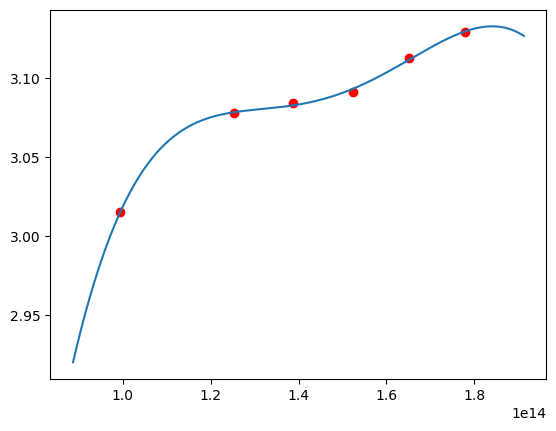

In [425]:
plt.plot(min_frequenz_total,n_array_total, "ro")
plt.plot(frequenz_20_no_edge,polynomial(frequenz_20_no_edge,*params_fit))

### Bei 80C

In [426]:
cutdown_80 = find_nearest(frequenz, 0.8e14)
cutup_80 = find_nearest(frequenz, 2.0e14)
ends_80 = 600
frequenz_80_cut = frequenz[cutdown_80:cutup_80]
frequenz_80_no_edge = frequenz[cutdown_80+ends_80:cutup_80-ends_80]
data_B12_80 = data[5][::-1][cutdown_80:cutup_80]
data_B12_80_no_edge = data_B12_80[ends_80:-ends_80]
B12_80_smooth, B12_80_smoothed_out = flatten(data_B12_80, N = 1200)
B12_80_smooth_no_edge = B12_80_smooth[ends_80:-ends_80]
B12_80_smoothed_out_no_edge= B12_80_smoothed_out[ends_80:-ends_80]

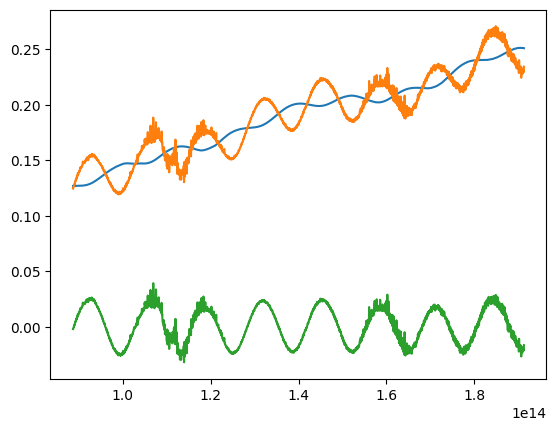

In [427]:
plt.plot(frequenz_80_no_edge, B12_80_smooth_no_edge)
plt.plot(frequenz_80_no_edge, data_B12_80_no_edge)
plt.plot(frequenz_80_no_edge, B12_80_smoothed_out_no_edge)

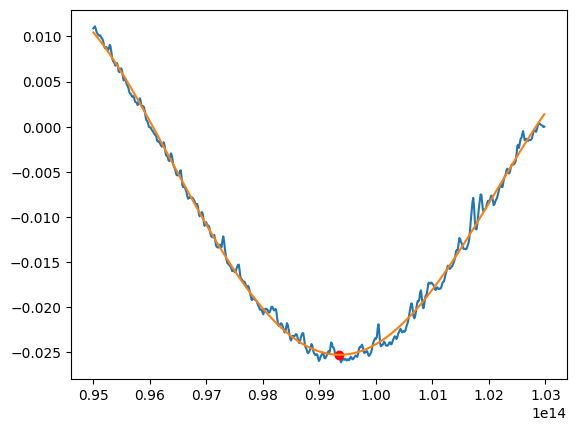

In [428]:
min_frequenz_80_first, min_absorption_80_first = fit_individually(0.95e14,1.03e14,frequenz_80_no_edge,B12_80_smoothed_out_no_edge, p0 = [1,1,1,1,1])

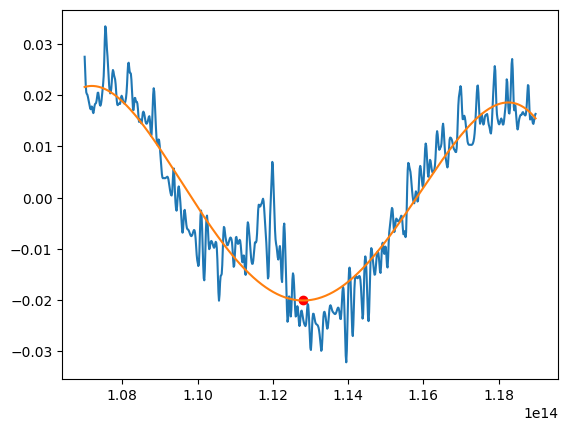

In [429]:
min_frequenz_80_second, min_absorption_80_second = fit_individually(1.07e14,1.19e14,frequenz_80_no_edge,B12_80_smoothed_out_no_edge, p0 = [1,1,1,1,1])

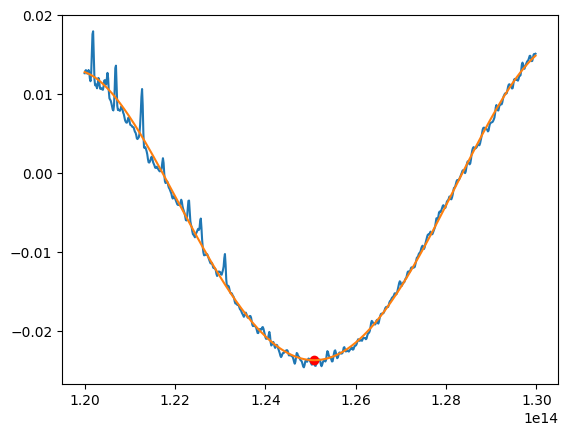

In [430]:
min_frequenz_80_third, min_absorption_80_third = fit_individually(1.2e14,1.3e14,frequenz_80_no_edge,B12_80_smoothed_out_no_edge, p0 = [1,1,1,1,1])

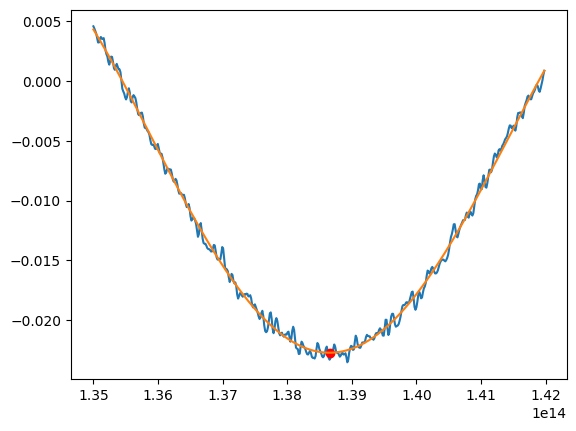

In [431]:
min_frequenz_80_fourth, min_absorption_80_fourth = fit_individually(1.35e14,1.42e14,frequenz_80_no_edge,B12_80_smoothed_out_no_edge, p0 = [1,1,1,1,1])

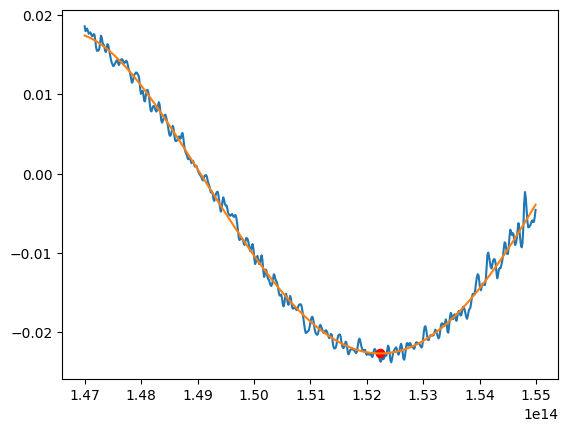

In [432]:
min_frequenz_80_fifth, min_absorption_80_fifth = fit_individually(1.47e14,1.55e14,frequenz_80_no_edge,B12_80_smoothed_out_no_edge, p0 = [1,1,1,1,1])

In [433]:
min_frequenz_80_total = [min_frequenz_80_first[0], min_frequenz_80_second[0], min_frequenz_80_third[0], min_frequenz_80_fourth[0], min_frequenz_80_fifth[0]]
min_absorption_80_total = [min_absorption_80_first[0], min_absorption_80_second[0], min_absorption_80_third[0], min_absorption_80_fourth[0], min_absorption_80_fifth[0]]

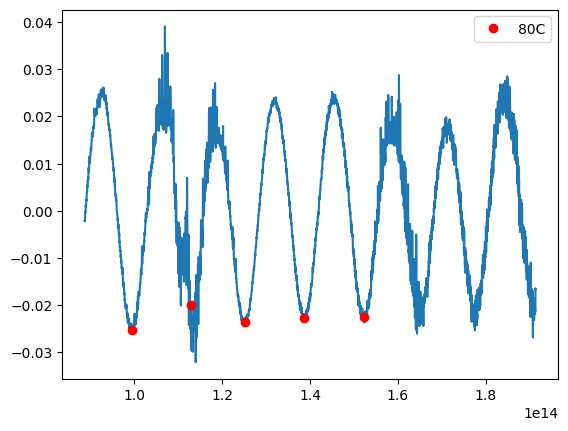

In [434]:
plt.plot(frequenz_80_no_edge,B12_80_smoothed_out_no_edge)
plt.plot(min_frequenz_80_total,min_absorption_80_total, "ro", label = "80C")
plt.legend()

In [435]:
m_array_80_total = calculate_m(min_frequenz_80_total)
m_array_80_total

[7.382384540936398, 9.191990578228532, 9.215122473343186, 10.215122450781676]

In [436]:
m_array_80_clean = np.arange(7,12)

In [437]:
n_array_80_total = []  
for i in range(0,len(m_array_80_clean)):
    n_array_80_total.append(polynomial(min_frequenz_80_total[i],*params_fit))

In [438]:
l_array_80_total = []
for i in range(0,len(m_array_80_clean)):
    l_array_80_total.append(länge(m_array_80_clean[i],n_array_80_total[i],min_frequenz_80_total[i]))
l_array_80_total

[3.503109393043603e-06,
 3.467640099771331e-06,
 3.5038379185545655e-06,
 3.5070563173718285e-06,
 3.50203938348462e-06]

### Bei 160C

In [439]:
cutoff_160 = find_nearest(frequenz, 1.0e14)
cutup_160 = find_nearest(frequenz, 2.0e14)
ends_160 = 600
frequenz_160_cut = frequenz[cutoff_160:cutup_160]
frequenz_160_no_edge = frequenz[cutoff_160+ends_160:cutup_160-ends_160]
data_B12_160 = data[7][::-1][cutoff_160:cutup_160]
data_B12_160_no_edge = data_B12_160[ends_160:-ends_160]
B12_160_smooth, B12_160_smoothed_out = flatten(data_B12_160, N = 1200)
B12_160_smooth_no_edge = B12_160_smooth[ends_160:-ends_160]
B12_160_smoothed_out_no_edge = B12_160_smoothed_out[ends_160:-ends_160]

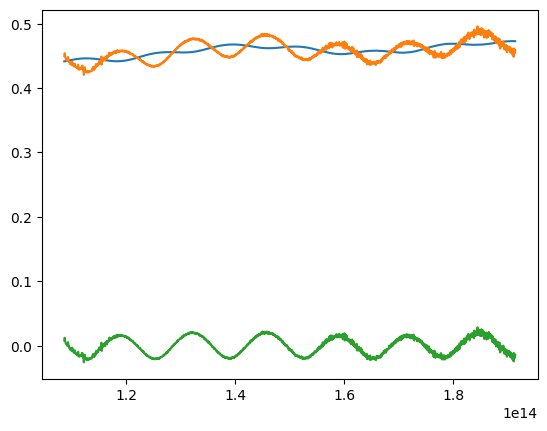

In [440]:
plt.plot(frequenz_160_no_edge, B12_160_smooth_no_edge)
plt.plot(frequenz_160_no_edge, data_B12_160_no_edge)
plt.plot(frequenz_160_no_edge, B12_160_smoothed_out_no_edge)

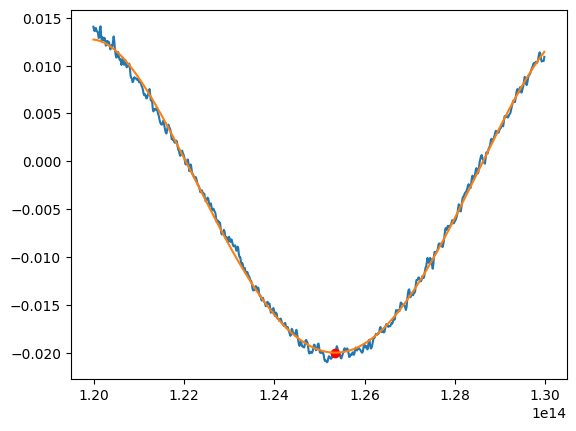

In [441]:
min_frequenz_160_first, min_absorption_160_first = fit_individually(1.2e14,1.3e14,frequenz_160_no_edge,B12_160_smoothed_out_no_edge, p0 = [1,1,1,1,1])

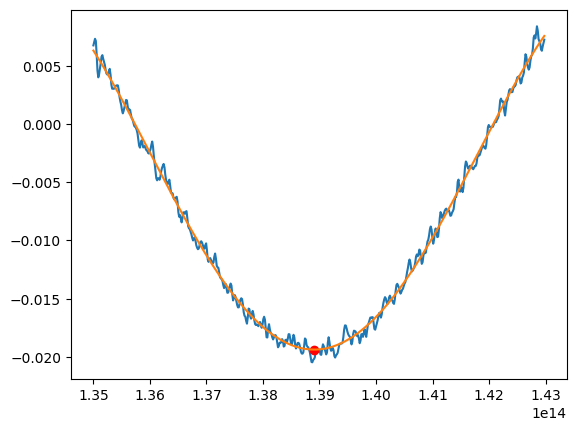

In [442]:
min_frequenz_160_second, min_absorption_160_second = fit_individually(1.35e14,1.43e14,frequenz_160_no_edge,B12_160_smoothed_out_no_edge, p0 = [1,1,1,1,1])

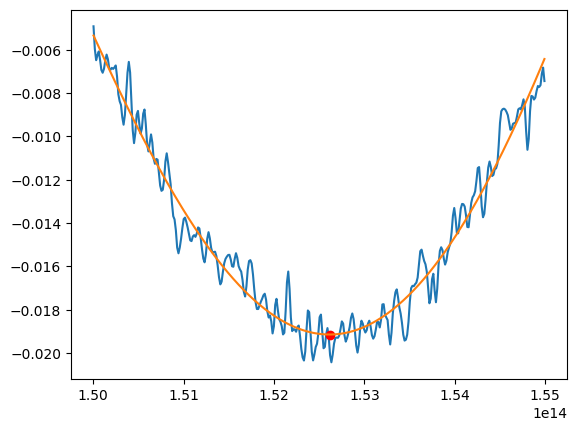

In [443]:
min_frequenz_160_third, min_absorption_160_third = fit_individually(1.5e14,1.55e14,frequenz_160_no_edge,B12_160_smoothed_out_no_edge, p0 = [1,1,1,1,1])

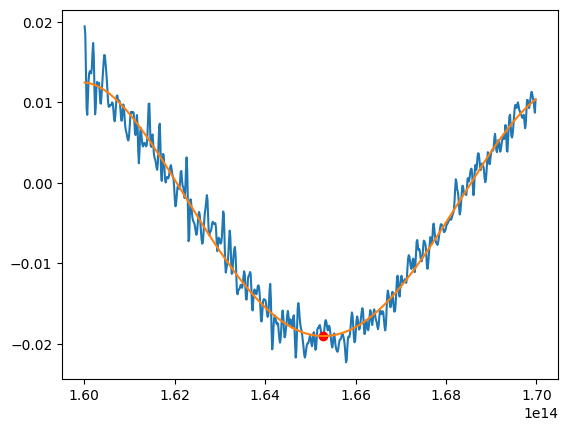

In [444]:
min_frequenz_160_fourth, min_absorption_160_fourth = fit_individually(1.6e14,1.7e14,frequenz_160_no_edge,B12_160_smoothed_out_no_edge, p0 = [1,1,1,1,1])

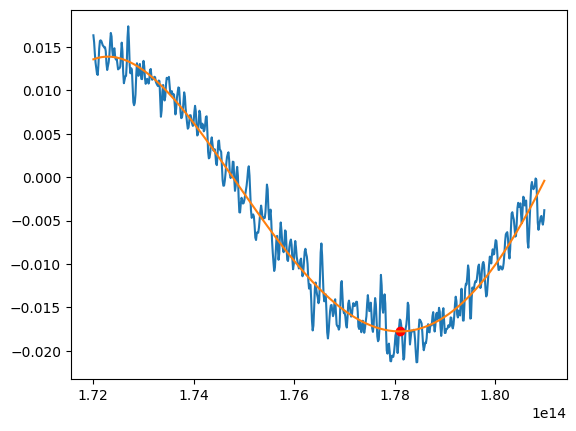

In [445]:
min_frequenz_160_fifth, min_absorption_160_fifth = fit_individually(1.72e14,1.81e14,frequenz_160_no_edge,B12_160_smoothed_out_no_edge, p0 = [1,1,1,1,1])

In [446]:
min_frequenz_160_total = [min_frequenz_160_first[0], min_frequenz_160_second[0], min_frequenz_160_third[0], min_frequenz_160_fourth[0], min_frequenz_160_fifth[0]]
min_absorption_160_total = [min_absorption_160_first[0], min_absorption_160_second[0], min_absorption_160_third[0], min_absorption_160_fourth[0], min_absorption_160_fifth[0]]


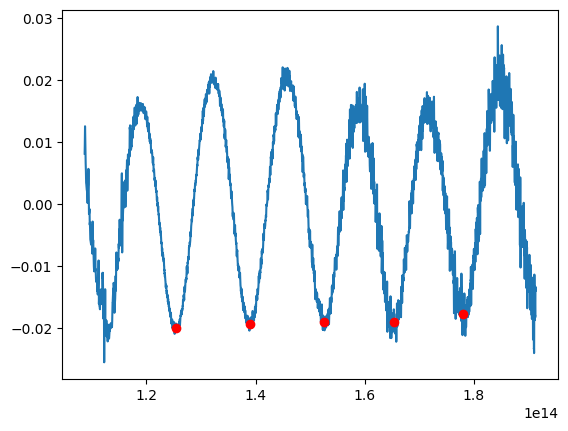

In [447]:
plt.plot(frequenz_160_no_edge,B12_160_smoothed_out_no_edge)
plt.plot(min_frequenz_160_total,min_absorption_160_total, "ro")

In [448]:
m_array_160_total = calculate_m(min_frequenz_160_total)
m_array_160_total

[9.255069364224624, 10.12539515890177, 12.052511408973995, 12.890642619203621]

In [449]:
m_array_160_clean = np.arange(9,14)

In [450]:
n_array_160_total = []
for i in range(0,len(m_array_160_clean)):
    n_array_160_total.append(polynomial(min_frequenz_160_total[i],*params_fit))
n_array_160_total

[3.0782860628078463,
 3.0826438003592562,
 3.0933281366027536,
 3.111558274548077,
 3.129448300809333]

In [451]:
l_array_160_total = []
for i in range(0,len(m_array_160_clean)):
    l_array_160_total.append(länge(m_array_160_clean[i],n_array_160_total[i],min_frequenz_160_total[i]))
l_array_160_total

[3.4960278602953586e-06,
 3.5007337570727133e-06,
 3.492574319039336e-06,
 3.4975645610139103e-06,
 3.4961514220228236e-06]